Import necessary packages and open an image

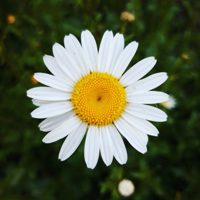

In [45]:
import cv2
from PIL import Image
import numpy as np
from urllib.request import urlopen 
import matplotlib.pyplot as plt
image = Image.open(urlopen("https://images.unsplash.com/photo-1592339078319-1f8cc9d67888?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8ZGFpc3klMjBmbG93ZXJ8ZW58MHx8MHx8&w=1000&q=80"))
image = image.resize([200, 200])
image

Translation

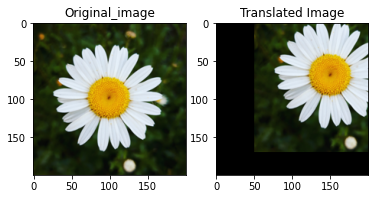

In [53]:
image_ = np.array(image)
M = np.float32([[1, 0, 50], [0, 1, -30]]) #shifting the image 50 pixels right and 30 pixels up
translated_image = cv2.warpAffine(image_, M, (image_.shape[1], image_.shape[0]))
translated_image = Image.fromarray(translated_image)
plt.subplot(1,2,1)
plt.title("Original_image")
plt.imshow(image_)
plt.subplot(1,2,2)
plt.title("Translated Image")
plt.imshow(translated_image)
plt.show()

Rotation

100 100


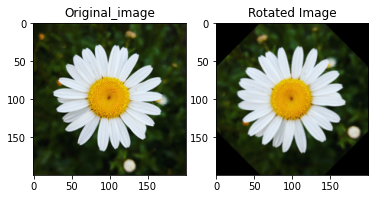

In [52]:
print(int(image_.shape[0]/2), int(image_.shape[1]/2))
image_rotation  = cv2.warpAffine(image_, cv2.getRotationMatrix2D([int(image_.shape[0]/2), int(image_.shape[1]/2)], 45, scale=1),(image_.shape[1], image_.shape[0]))
image_rotation =  Image.fromarray(image_rotation)
plt.subplot(1,2,1)
plt.title("Original_image")
plt.imshow(image_)
plt.subplot(1,2,2)
plt.title("Rotated Image")
plt.imshow(image_rotation)
plt.show()


Scaling 

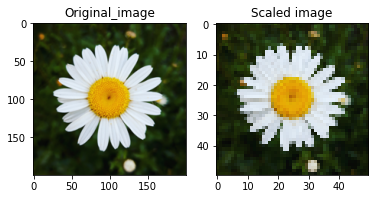

In [51]:
resized_image = cv2.resize(image_, [50,50])
resized_image = Image.fromarray(resized_image)
resized_image
plt.subplot(1,2,1)
plt.title("Original_image")
plt.imshow(image_)
plt.subplot(1,2,2)
plt.title("Scaled image")
plt.imshow(resized_image)
plt.show()

Affine Transform

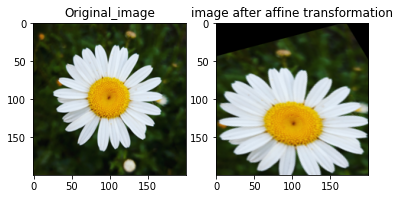

In [49]:
# 2 set of 3 points must be chosen one from input image and the other from the output image. 
# In the output image, the output is modified in such a way that the input points are aligned with respect to
#  the output point. 
'''point1 = np.float32([[10, 20], [40, 20], [80, 20]])
point2 = np.float32([[0, 5], [10, 50], [100,40]])'''

point1 = np.float32([[50,50],[200,50],[50,200]])
point2 = np.float32([[10,100],[200,50],[100,250]])

m = cv2.getAffineTransform(point1, point2)
affine_transformed = cv2.warpAffine(image_, m, [200, 200])
#affine_transformed = Image.fromarray(affine_transformed)
#affine_transformed

plt.subplot(1,2,1)
plt.title("Original_image")
plt.imshow(image_)
plt.subplot(1,2,2)
plt.title("image after affine transformation")
plt.imshow(affine_transformed)
plt.show()

Perspective Transform

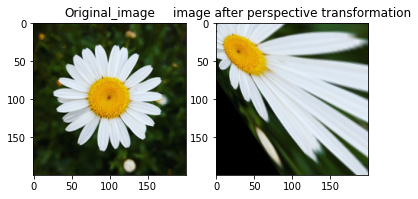

In [60]:
'''pts1 = np.float32([[20,140],[140,20],[140,140],[20, 20]])
pts2 = np.float32([[20,140],[140,20],[140, 190],[190,140]])

pts1 = np.float32([[56,65],[200,52],[28,200],[200,200]])
pts2 = np.float32([[0,0],[200,0],[0,200],[200,200]])'''
pts1 = np.float32([[50, 50], [150,50],
                       [50,150], [150, 150]])
pts2 = np.float32([[0, 0], [150, 0],
                       [0, 50], [150, 200]])

M = cv2.getPerspectiveTransform(pts1,pts2)
perspective_transformed = cv2.warpPerspective(image_, M, [200, 200])

plt.subplot(1,2,1)
plt.title("Original_image")
plt.imshow(image_)
plt.subplot(1,2,2)
plt.title("image after perspective transformation")
plt.imshow(perspective_transformed)
plt.show()